In [1]:
!pip install pandas matplotlib seaborn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Replace 'your_file_path.csv' with the actual path to your CSV file
df = pd.read_csv(r"C:\Users\04\Desktop\xxx\covid_variants_dataset.csv")

# Display the first few rows of the dataset to get an overview
df.head()

,Variant,Country,Date_Detected,Cases,Deaths,Recovered,Hospitalized,Transmission_Rate,Mutation_Count,Severity_Level
0,Mu,USA,2022-03-19,38091,232,15458,1476,1.27,10,Moderate
1,Delta,Canada,2021-06-29,79157,1552,58030,3967,1.16,7,Moderate
2,Epsilon,UK,2022-07-18,7071,3270,83006,1976,2.24,14,Mild
3,Omicron,UK,2020-08-30,29239,2409,16401,385,0.98,16,Moderate
4,Mu,Germany,2023-09-29,85545,3512,4181,272,0.73,15,Severe


In [18]:
# ตรวจสอบค่าที่หายไปในชุดข้อมูล
df.isnull().sum()

# ตรวจสอบประเภทข้อมูลของแต่ละคอลัมน์
df.dtypes

# สถิติเบื้องต้นของคอลัมน์ตัวเลข
df.describe()

# ข้อมูลโดยสรุป เช่น จำนวนข้อมูลที่ไม่เป็นค่า null และประเภทข้อมูล
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Variant            1000 non-null   object 
 1   Country            1000 non-null   object 
 2   Date_Detected      1000 non-null   object 
 3   Cases              1000 non-null   int64  
 4   Deaths             1000 non-null   int64  
 5   Recovered          1000 non-null   int64  
 6   Hospitalized       1000 non-null   int64  
 7   Transmission_Rate  1000 non-null   float64
 8   Mutation_Count     1000 non-null   int64  
 9   Severity_Level     1000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 78.3+ KB


In [22]:
print(df.columns)

Index(['Variant', 'Country', 'Date_Detected', 'Cases', 'Deaths', 'Recovered',
       'Hospitalized', 'Transmission_Rate', 'Mutation_Count',
       'Severity_Level'],
      dtype='object')


In [32]:
# ลบคอลัมน์ที่มีค่าหายไป
df = df.dropna(axis=1)  # ลบคอลัมน์ที่มีค่าหายไป

# หรือ เติมค่าหายไปด้วยวิธี forward fill
df.fillna(method='ffill', inplace=True)

C:\Users\04\AppData\Local\Temp\ipykernel_15880\2484712643.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


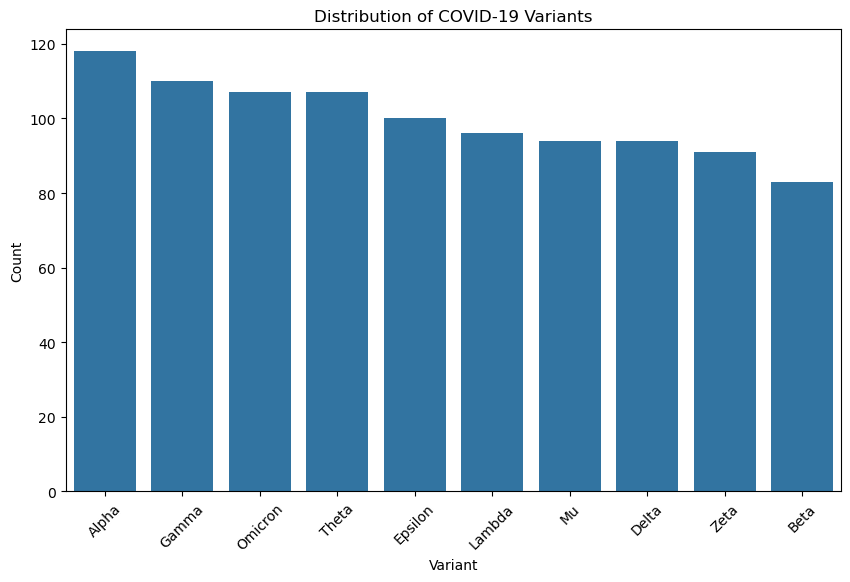

In [36]:
variant_counts = df['Variant'].value_counts()

# วาดกราฟแท่งแสดงการกระจายของสายพันธุ์
plt.figure(figsize=(10, 6))
sns.barplot(x=variant_counts.index, y=variant_counts.values)
plt.title('Distribution of COVID-19 Variants')
plt.xlabel('Variant')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [38]:
# บันทึก DataFrame ที่ทำความสะอาดแล้วเป็นไฟล์ CSV ใหม่
df.to_csv('cleaned_covid_variants.csv', index=False)